## DecisionTreeClassifier 介绍
DecisionTreeClassifier 是 scikit-learn 库中用于分类问题的决策树算法实现。决策树通过对特征空间进行递归划分，构建树形结构进行预测，适合处理非线性关系的数据。

## 参数详解

以下是 DecisionTreeClassifier 的主要参数及其功能：

1. criterion (str, 可选): 衡量划分质量的函数
    - 'gini': 使用基尼不纯度 (默认)
    - 'entropy': 使用信息增益
2. splitter (str, 可选): 决策树分支策略
    - 'best': 选择最优分裂 (默认)
    - 'random': 随机选择最佳分裂
3. max_depth (int or None, 可选): 树的最大深度
    - None: 节点会一直分裂直到所有叶子都是纯的，或直到所有叶子包含的样本数小于 min_samples_split
4. min_samples_split (int or float, 可选): 分裂内部节点所需的最小样本数
    - 整数：直接指定样本数
    - 浮点数：指定为样本总数的比例
5. min_samples_leaf (int or float, 可选): 叶子节点所需的最小样本数
    - 类似 min_samples_split 的设置方式
6. min_weight_fraction_leaf (float, 可选): 叶子节点所需的最小权重总和
    - 相对于所有样本权重总和的比例
7. max_features (int, float, str or None, 可选): 寻找最佳分裂时考虑的特征数量
    - 整数：直接指定特征数
    - 浮点数：指定为特征总数的比例
    - 'auto': max_features=sqrt(n_features)
    - 'sqrt': max_features=sqrt(n_features)
    - 'log2': max_features=log2(n_features)
    - None: max_features=n_features
8. random_state (int, RandomState instance or None, 可选): 随机数生成器的种子
    - 确保结果可重现
9. max_leaf_nodes (int or None, 可选): 最大叶子节点数
    - None: 叶子节点数量不限
    - 整数：限制最大叶子节点数量
10. min_impurity_decrease (float, 可选): 分裂所需的最小不纯度减少量
    - 如果分裂导致的不纯度减少大于或等于此值，则进行分裂
11. class_weight (dict, list of dicts, 'balanced' or None, 可选): 类别权重
    - None: 所有类别的权重相等
    - 'balanced': 自动调整权重为 n_samples / (n_classes * np.bincount (y))
12. ccp_alpha (non-negative float, 可选): 用于最小成本复杂度剪枝的参数
    - 较大的 alpha 值会导致更多的剪枝

### 参数一：criterion (str, 可选): 衡量划分质量的函数

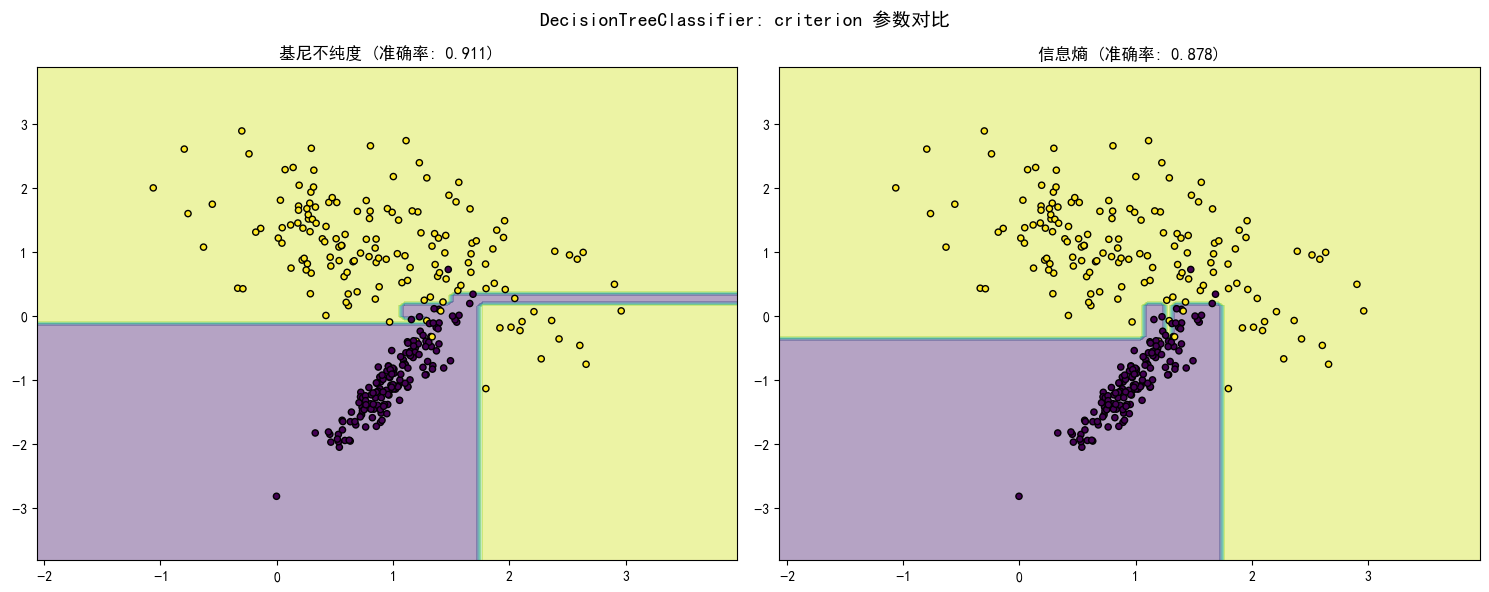

基尼不纯度决策树结构:
节点总数: 25
叶子节点数: 13

信息熵决策树结构:
节点总数: 21
叶子节点数: 11

鸢尾花数据集10折交叉验证结果:
基尼不纯度平均准确率: 0.953 ± 0.043
信息熵平均准确率: 0.960 ± 0.044


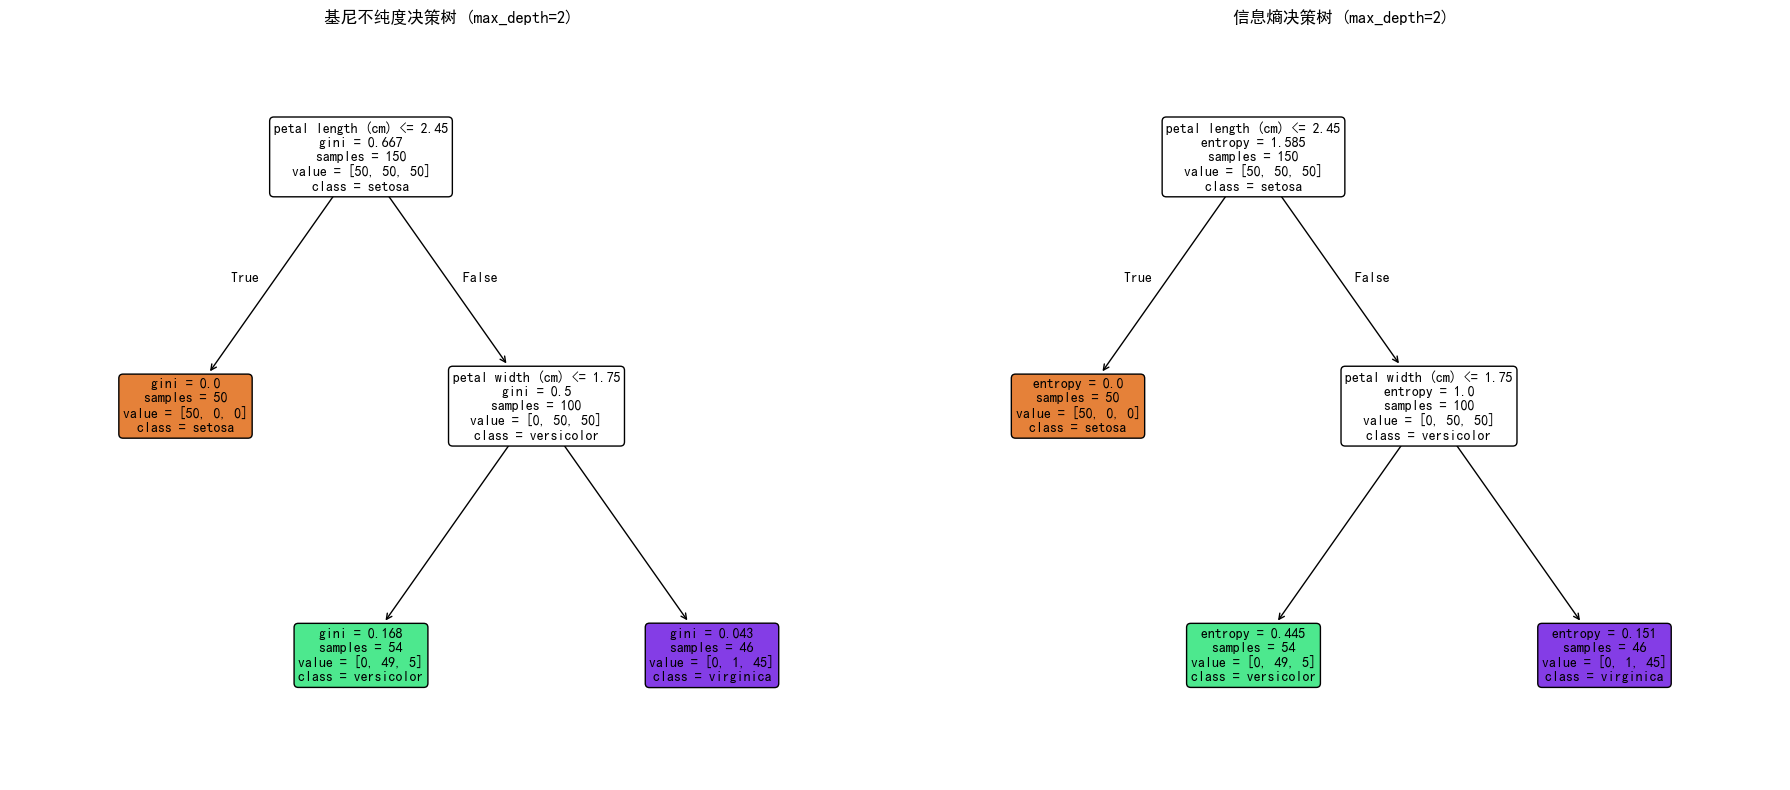

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建基于基尼不纯度的决策树
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

# 创建基于信息熵的决策树
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)

# 可视化决策边界
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 基尼不纯度决策边界
DecisionBoundaryDisplay.from_estimator(
    clf_gini, X, alpha=0.4, ax=axes[0], response_method="predict"
)
axes[0].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
axes[0].set_title(f"基尼不纯度 (准确率: {accuracy_score(y_test, clf_gini.predict(X_test)):.3f})")

# 信息熵决策边界
DecisionBoundaryDisplay.from_estimator(
    clf_entropy, X, alpha=0.4, ax=axes[1], response_method="predict"
)
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
axes[1].set_title(f"信息熵 (准确率: {accuracy_score(y_test, clf_entropy.predict(X_test)):.3f})")

plt.suptitle("DecisionTreeClassifier: criterion 参数对比", fontsize=14)
plt.tight_layout()
plt.show()

# 对比树的结构复杂度
print("基尼不纯度决策树结构:")
print(f"节点总数: {clf_gini.tree_.node_count}")
print(f"叶子节点数: {clf_gini.tree_.n_leaves}")

print("\n信息熵决策树结构:")
print(f"节点总数: {clf_entropy.tree_.node_count}")
print(f"叶子节点数: {clf_entropy.tree_.n_leaves}")

# 在鸢尾花数据集上进行10折交叉验证比较
iris = load_iris()
cv_gini = cross_val_score(DecisionTreeClassifier(criterion="gini"), 
                          iris.data, iris.target, cv=10)
cv_entropy = cross_val_score(DecisionTreeClassifier(criterion="entropy"), 
                             iris.data, iris.target, cv=10)

print("\n鸢尾花数据集10折交叉验证结果:")
print(f"基尼不纯度平均准确率: {cv_gini.mean():.3f} ± {cv_gini.std():.3f}")
print(f"信息熵平均准确率: {cv_entropy.mean():.3f} ± {cv_entropy.std():.3f}")

# 可视化树结构差异（以小深度树为例）
small_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
small_tree_gini.fit(iris.data, iris.target)

small_tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
small_tree_entropy.fit(iris.data, iris.target)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

plot_tree(small_tree_gini, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True,
          fontsize=10,
          ax=axes[0])
axes[0].set_title("基尼不纯度决策树 (max_depth=2)")

plot_tree(small_tree_entropy, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True,
          fontsize=10,
          ax=axes[1])
axes[1].set_title("信息熵决策树 (max_depth=2)")

plt.tight_layout()
plt.show()

### 参数二：splitter (str, 可选): 决策树分支策略

splitter 参数控制决策树在每个节点选择分裂特征的策略，主要影响决策树的搜索方式和最终形态。在 scikit-learn 的 DecisionTreeClassifier 中，该参数有两种选项：
1. best（默认值）：在所有可能的特征和阈值中选择最优分裂点
    - 对每个特征计算所有可能的分裂阈值
    - 根据 criterion（基尼不纯度或信息熵）选择最优分裂
    - 倾向于生成更规则、更平衡的树
2. random：随机选择特征，然后在该特征的随机阈值中选择最佳分裂点
    - 仅考虑随机选择的一部分特征（通常是全部特征）
    - 在选定特征的随机阈值中寻找最优分裂
    - 倾向于生成更随机、更不规则的树，有助于引入随机性减少过拟合
#### 核心差异
|参数值|	搜索策略|	计算效率|	树的复杂度	抗过拟合能力|
| ---- | ---- | ---- | ---- |
|best	|全局最优	|较低	|较高	|较弱
|random	|局部随机	|较高	|较低	|较强

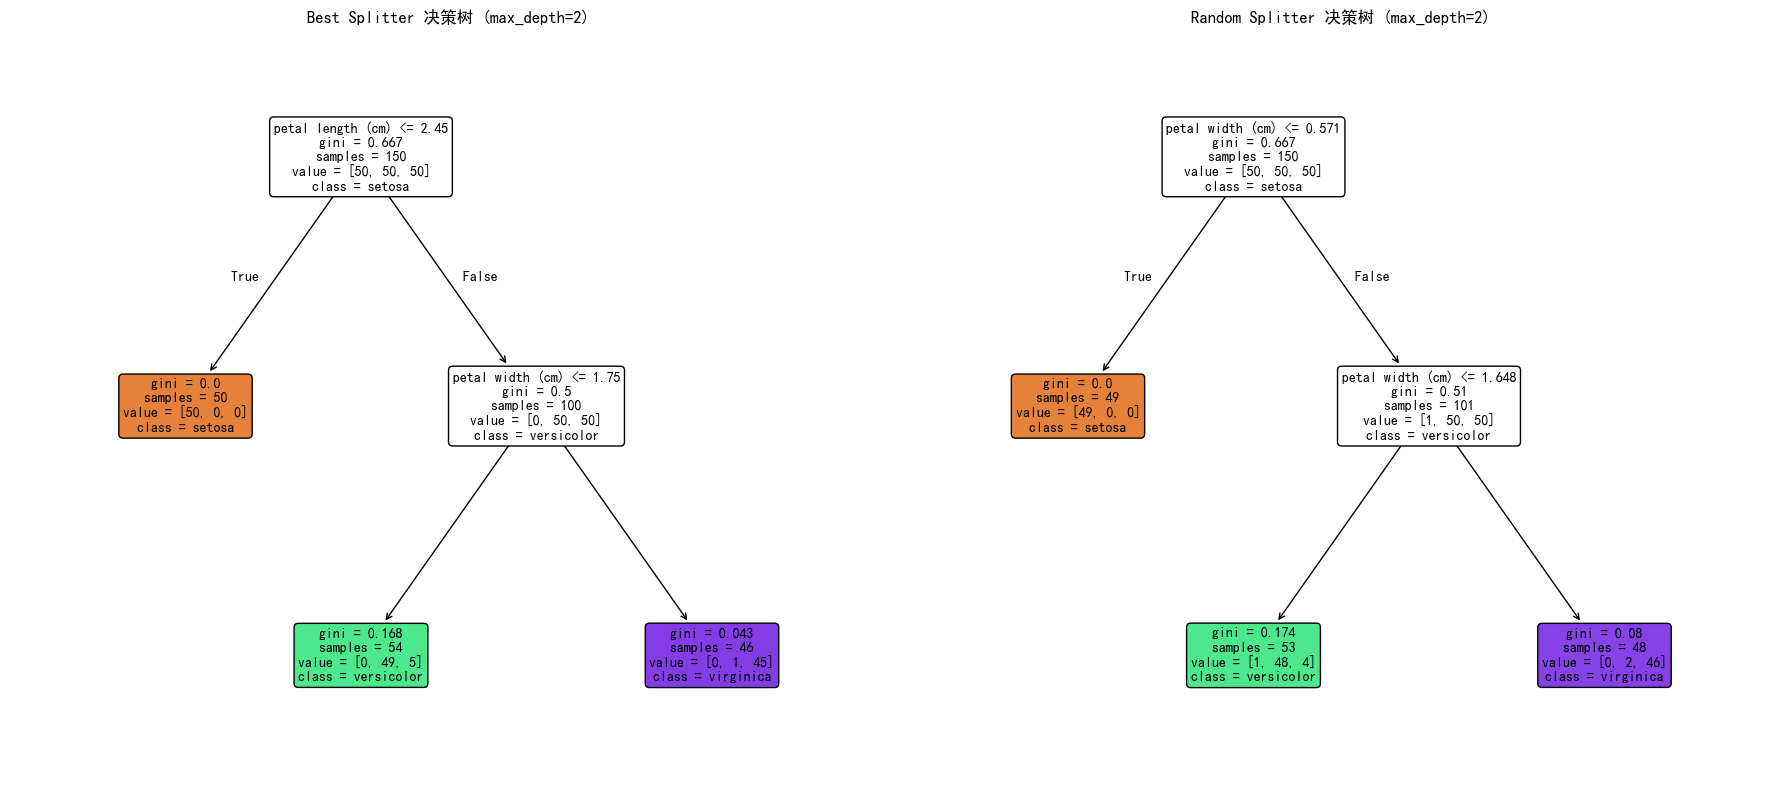

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=3000, 
    n_features=200, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# 可视化树结构差异（以小深度树为例）
small_tree_best = DecisionTreeClassifier(splitter="best", max_depth=2, random_state=42)
small_tree_best.fit(iris.data, iris.target)

small_tree_random = DecisionTreeClassifier(splitter="random", max_depth=2, random_state=42)
small_tree_random.fit(iris.data, iris.target)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

plot_tree(small_tree_best, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True,
          fontsize=10,
          ax=axes[0])
axes[0].set_title("Best Splitter 决策树 (max_depth=2)")

plot_tree(small_tree_random, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True,
          fontsize=10,
          ax=axes[1])
axes[1].set_title("Random Splitter 决策树 (max_depth=2)")

plt.tight_layout()
plt.show()

### 参数三：max_depth (int or None, 可选): 树的最大深度

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=3000, 
    n_features=20, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的max_depth值
depths = [2, 5, 10, None]
models = []
train_accuracies = []
test_accuracies = []

# 训练模型并评估
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"max_depth={depth if depth is not None else 'None'}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  树节点数: {clf.tree_.node_count}")
    print(f"  叶子节点数: {clf.tree_.n_leaves}")
    print()

for i, (depth, clf) in enumerate(zip(depths, models)):
    title = f"max_depth={depth if depth is not None else 'None'}"
    title += f" (测试集准确率: {test_accuracies[i]:.3f})"
    

max_depth=2
  训练集准确率: 0.9095
  测试集准确率: 0.8944
  树节点数: 7
  叶子节点数: 4

max_depth=5
  训练集准确率: 0.9314
  测试集准确率: 0.8922
  树节点数: 51
  叶子节点数: 26

max_depth=10
  训练集准确率: 0.9667
  测试集准确率: 0.8767
  树节点数: 171
  叶子节点数: 86

max_depth=None
  训练集准确率: 1.0000
  测试集准确率: 0.8589
  树节点数: 293
  叶子节点数: 147



### 参数四：min_samples_split (int or float, 可选): 分裂内部节点所需的最小样本数

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=3000, 
    n_features=20, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的min_samples_split值
split_values = [2, 10, 50, 100]
models = []
train_accuracies = []
test_accuracies = []

# 训练模型并评估
for split in split_values:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"min_samples_split={split}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  树节点数: {clf.tree_.node_count}")
    print(f"  叶子节点数: {clf.tree_.n_leaves}")
    print()

min_samples_split=2
  训练集准确率: 1.0000
  测试集准确率: 0.8589
  树节点数: 293
  叶子节点数: 147

min_samples_split=10
  训练集准确率: 0.9724
  测试集准确率: 0.8589
  树节点数: 209
  叶子节点数: 105

min_samples_split=50
  训练集准确率: 0.9395
  测试集准确率: 0.8867
  树节点数: 121
  叶子节点数: 61

min_samples_split=100
  训练集准确率: 0.9281
  测试集准确率: 0.8933
  树节点数: 93
  叶子节点数: 47



### 参数五：min_samples_leaf (int or float, 可选): 叶子节点所需的最小样本数

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的min_samples_leaf值
leaf_values = [1, 5, 10, 20]
models = []
train_accuracies = []
test_accuracies = []

# 训练模型并评估
for leaf in leaf_values:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"min_samples_leaf={leaf}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  树节点数: {clf.tree_.node_count}")
    print(f"  叶子节点数: {clf.tree_.n_leaves}")
    print()

min_samples_leaf=1
  训练集准确率: 1.0000
  测试集准确率: 0.9111
  树节点数: 25
  叶子节点数: 13

min_samples_leaf=5
  训练集准确率: 0.9810
  测试集准确率: 0.9444
  树节点数: 17
  叶子节点数: 9

min_samples_leaf=10
  训练集准确率: 0.9667
  测试集准确率: 0.9444
  树节点数: 15
  叶子节点数: 8

min_samples_leaf=20
  训练集准确率: 0.9190
  测试集准确率: 0.9222
  树节点数: 11
  叶子节点数: 6



### 参数六：min_weight_fraction_leaf (float, 可选): 叶子节点所需的最小权重总和

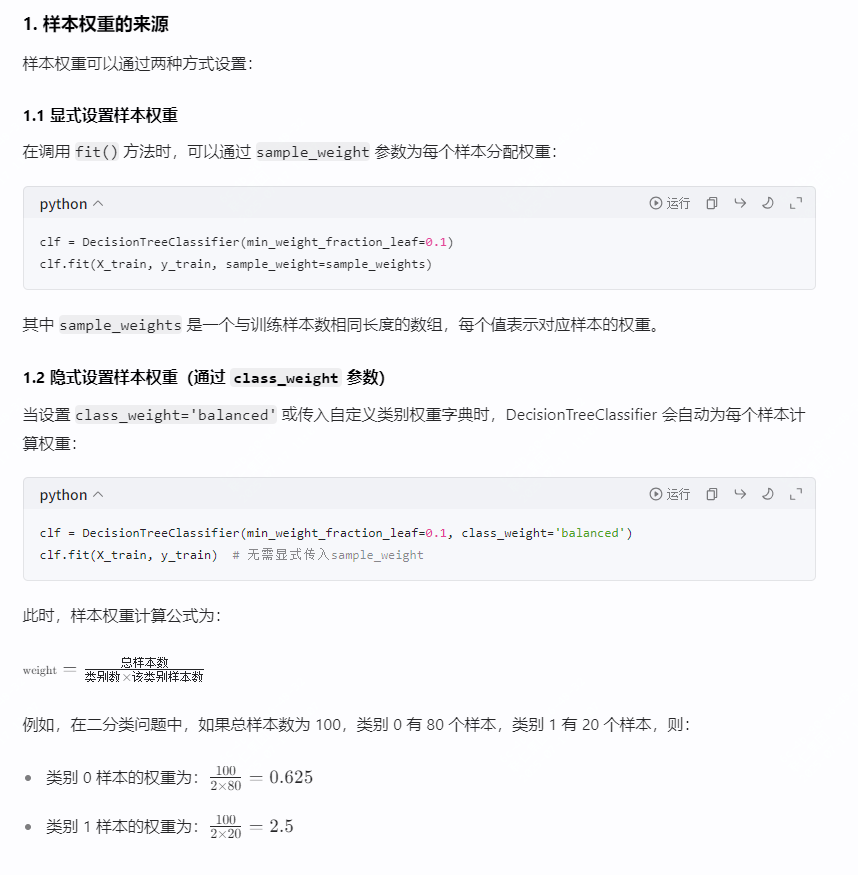

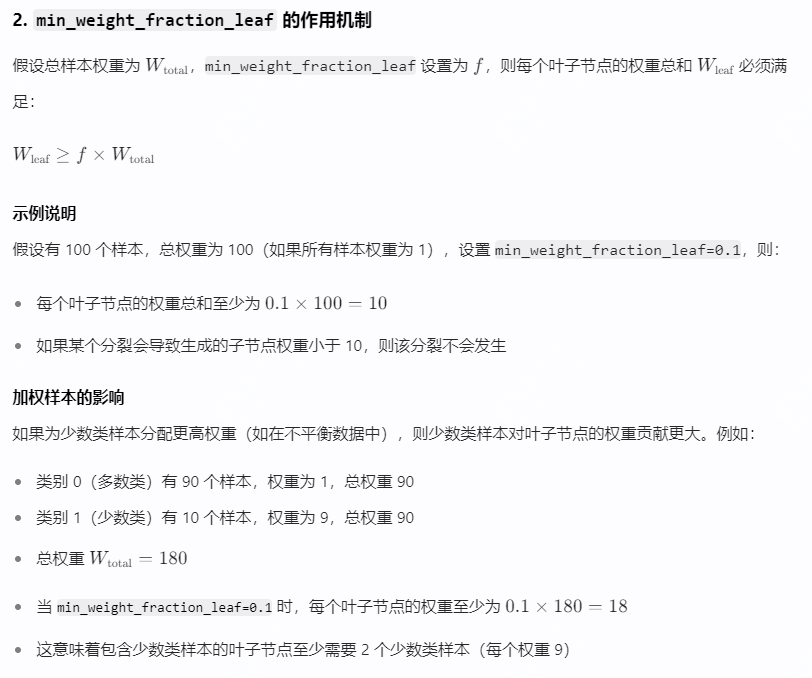

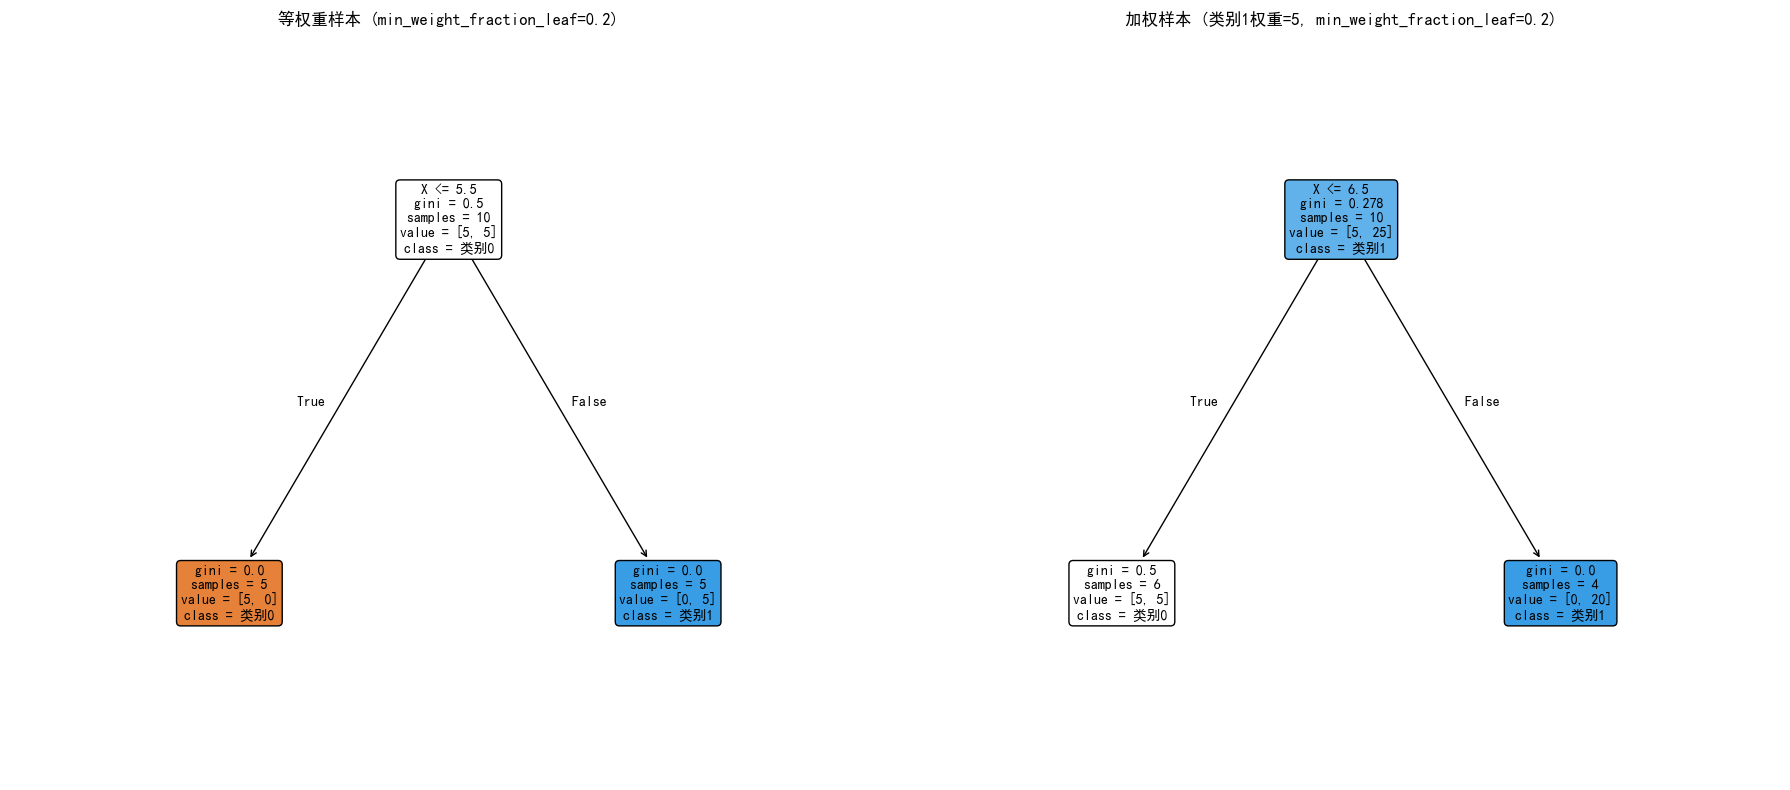

等权重情景:
  总权重: 10.0
  叶子节点最小权重要求: 2.0
  树节点数: 3
  叶子节点数: 2

加权情景:
  总权重: 30.0
  叶子节点最小权重要求: 6.0
  树节点数: 3
  叶子节点数: 2


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 创建简单的二分类数据集
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 情景1：所有样本权重相等
weights_equal = np.ones(len(y))

# 情景2：为类别1样本分配更高权重
weights_unequal = np.ones(len(y))
weights_unequal[y == 1] = 5  # 类别1样本权重为5，类别0仍为1

# 训练两棵决策树
clf_equal = DecisionTreeClassifier(min_weight_fraction_leaf=0.2, random_state=42)
clf_equal.fit(X, y, sample_weight=weights_equal)

clf_unequal = DecisionTreeClassifier(min_weight_fraction_leaf=0.2, random_state=42)
clf_unequal.fit(X, y, sample_weight=weights_unequal)

# 可视化两棵树
plt.figure(figsize=(18, 8))

plt.subplot(121)
plot_tree(
    clf_equal,
    feature_names=['X'],
    class_names=['类别0', '类别1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("等权重样本 (min_weight_fraction_leaf=0.2)")

plt.subplot(122)
plot_tree(
    clf_unequal,
    feature_names=['X'],
    class_names=['类别0', '类别1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("加权样本 (类别1权重=5, min_weight_fraction_leaf=0.2)")

plt.tight_layout()
plt.show()

# 计算关键指标
total_weight_equal = np.sum(weights_equal)
total_weight_unequal = np.sum(weights_unequal)

print(f"等权重情景:")
print(f"  总权重: {total_weight_equal}")
print(f"  叶子节点最小权重要求: {0.2 * total_weight_equal}")
print(f"  树节点数: {clf_equal.tree_.node_count}")
print(f"  叶子节点数: {clf_equal.tree_.n_leaves}")

print(f"\n加权情景:")
print(f"  总权重: {total_weight_unequal}")
print(f"  叶子节点最小权重要求: {0.2 * total_weight_unequal}")
print(f"  树节点数: {clf_unequal.tree_.node_count}")
print(f"  叶子节点数: {clf_unequal.tree_.n_leaves}")

### 参数七：max_features (int, float, str or None, 可选): 寻找最佳分裂时考虑的特征数量

|参数值	|含义|
| ---- | ---- |
|None (默认值)	|考虑所有特征 (n_features)|
|整数	|直接指定每次分裂考虑的特征数量|
|浮点数	|表示为总特征数的比例 (例如 0.5 表示考虑一半的特征)|
|'auto'	|对于分类问题，等同于 sqrt(n_features)；对于回归问题，等同于 n_features|
|'sqrt'	|考虑 sqrt(n_features) 个特征 (例如 100 个特征则考虑 10 个)|
|'log2'	|考虑 log2(n_features) 个特征 (例如 100 个特征则考虑约 7 个)|
|'sqrt'	|考虑 sqrt(n_features) 个特征 (例如 100 个特征则考虑 10 个)|

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_digits
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成高维数据集 (50个特征)
X, y = make_classification(
    n_samples=500, 
    n_features=5000, 
    n_informative=10, 
    n_redundant=10,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的max_features值
feature_options = ['sqrt', 'log2', None, 5, 10]
feature_names = ['sqrt', 'log2', 'None', '5', '10']
models = []
train_accuracies = []
test_accuracies = []
train_times = []

# 训练模型并评估
for option in feature_options:
    clf = DecisionTreeClassifier(max_features=option, random_state=42)
    
    # 记录训练时间
    import time
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_times.append(train_time)
    
    print(f"max_features={feature_names[feature_options.index(option)]}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  训练时间: {train_time:.4f}秒")
    print(f"  树节点数: {clf.tree_.node_count}")
    print(f"  叶子节点数: {clf.tree_.n_leaves}")
    print()


max_features=sqrt
  训练集准确率: 1.0000
  测试集准确率: 0.5600
  训练时间: 0.0236秒
  树节点数: 93
  叶子节点数: 47

max_features=log2
  训练集准确率: 1.0000
  测试集准确率: 0.5267
  训练时间: 0.0070秒
  树节点数: 133
  叶子节点数: 67

max_features=None
  训练集准确率: 1.0000
  测试集准确率: 0.7200
  训练时间: 1.1731秒
  树节点数: 43
  叶子节点数: 22

max_features=5
  训练集准确率: 1.0000
  测试集准确率: 0.5800
  训练时间: 0.0060秒
  树节点数: 157
  叶子节点数: 79

max_features=10
  训练集准确率: 1.0000
  测试集准确率: 0.4800
  训练时间: 0.0070秒
  树节点数: 121
  叶子节点数: 61



### 参数九：max_leaf_nodes (int or None, 可选): 最大叶子节点数

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的max_leaf_nodes值
leaf_nodes = [2, 5, 10, None]
models = []
train_accuracies = []
test_accuracies = []

# 训练模型并评估
for nodes in leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"max_leaf_nodes={nodes if nodes is not None else 'None'}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  实际叶子节点数: {clf.tree_.n_leaves}")
    print(f"  树深度: {clf.get_depth()}")
    print()

max_leaf_nodes=2
  训练集准确率: 0.9190
  测试集准确率: 0.9222
  实际叶子节点数: 2
  树深度: 1

max_leaf_nodes=5
  训练集准确率: 0.9810
  测试集准确率: 0.9444
  实际叶子节点数: 5
  树深度: 4

max_leaf_nodes=10
  训练集准确率: 0.9905
  测试集准确率: 0.9111
  实际叶子节点数: 10
  树深度: 6

max_leaf_nodes=None
  训练集准确率: 1.0000
  测试集准确率: 0.9111
  实际叶子节点数: 13
  树深度: 6



### 参数十：min_impurity_decrease (float, 可选): 分裂所需的最小不纯度减少量

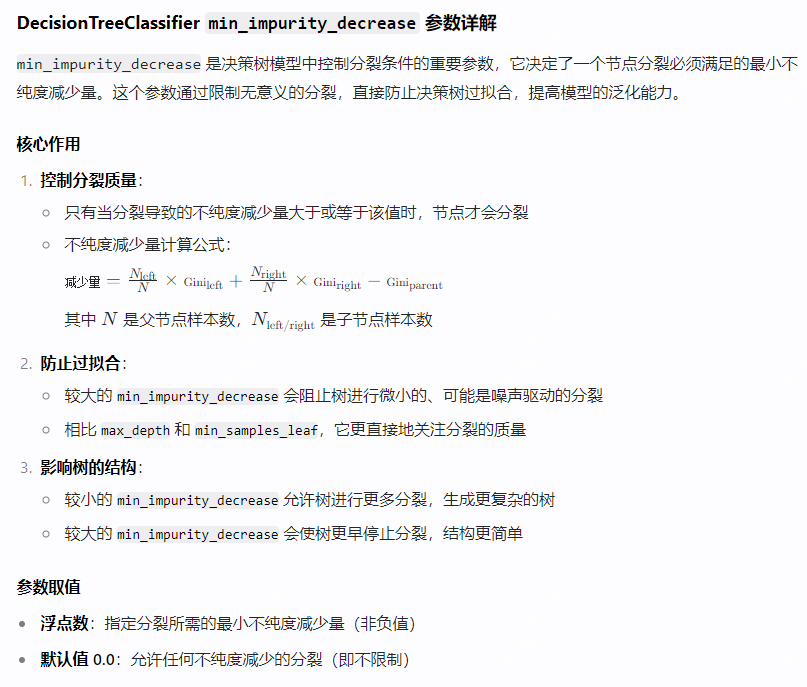

#### 与其他参数的关系
|参数	|控制对象	|作用方式	|防止过拟合效果|
| ---- | ---- | ---- | ---- |
|min_samples_split	|分裂所需样本数	|限制内部节点分裂所需的最小样本数	|中等|
|min_samples_leaf	|叶子节点样本数	|限制叶子节点必须包含的最小样本数	|较强|
|min_impurity_decrease	|分裂质量	|限制分裂必须满足的最小不纯度减少量	|强|

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# 设置随机种子确保结果可重现
np.random.seed(42)

# 生成一个非线性可分的数据集
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的min_impurity_decrease值
decrease_values = [0.0, 0.01, 0.05, 0.1]
models = []
train_accuracies = []
test_accuracies = []

# 训练模型并评估
for decrease in decrease_values:
    clf = DecisionTreeClassifier(min_impurity_decrease=decrease, random_state=42)
    clf.fit(X_train, y_train)
    models.append(clf)
    
    # 计算准确率
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"min_impurity_decrease={decrease}")
    print(f"  训练集准确率: {train_acc:.4f}")
    print(f"  测试集准确率: {test_acc:.4f}")
    print(f"  树节点数: {clf.tree_.node_count}")
    print(f"  叶子节点数: {clf.tree_.n_leaves}")
    print(f"  树深度: {clf.get_depth()}")
    print()

min_impurity_decrease=0.0
  训练集准确率: 1.0000
  测试集准确率: 0.9111
  树节点数: 25
  叶子节点数: 13
  树深度: 6

min_impurity_decrease=0.01
  训练集准确率: 0.9810
  测试集准确率: 0.9444
  树节点数: 9
  叶子节点数: 5
  树深度: 4

min_impurity_decrease=0.05
  训练集准确率: 0.9667
  测试集准确率: 0.9444
  树节点数: 5
  叶子节点数: 3
  树深度: 2

min_impurity_decrease=0.1
  训练集准确率: 0.9190
  测试集准确率: 0.9222
  树节点数: 3
  叶子节点数: 2
  树深度: 1

